In [1]:
#create a new Spark Session
from pyspark.sql import SparkSession

In [2]:
#create first builder app
spark = SparkSession.builder.appName("Our First Spark App").getOrCreate()

In [3]:
#get details of our builder
spark.sparkContext.getConf().getAll()

[('spark.app.id', 'local-1572417763884'),
 ('spark.app.name', 'Our First Spark App'),
 ('spark.driver.host', 'LAPTOP-MGK4RHBV'),
 ('spark.driver.port', '56432'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true')]

In [4]:
spark

In [5]:
#open some data
path = "sparkify_log_small.json"
user_log = spark.read.json(path)

In [6]:
#check information of data
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [7]:
#checking our first row
user_log.head()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046')

In [8]:
#convert spark into pandas dataframe
user_log.toPandas()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Showaddywaddy,Logged In,Kenneth,M,112,Matthews,232.93342,paid,"Charlotte-Concord-Gastonia, NC-SC",PUT,NextSong,1.509380e+12,5132,Christmas Tears Will Fall,200,1513720872284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1046
1,Lily Allen,Logged In,Elizabeth,F,7,Chase,195.23873,free,"Shreveport-Bossier City, LA",PUT,NextSong,1.512719e+12,5027,Cheryl Tweedy,200,1513720878284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1000
2,Cobra Starship Featuring Leighton Meester,Logged In,Vera,F,6,Blackwell,196.20526,paid,"Racine, WI",PUT,NextSong,1.499856e+12,5516,Good Girls Go Bad (Feat.Leighton Meester) (Alb...,200,1513720881284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",2219
3,Alex Smoke,Logged In,Sophee,F,8,Barker,405.99465,paid,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",PUT,NextSong,1.513010e+12,2372,Don't See The Point,200,1513720905284,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2373
4,None,Logged In,Jordyn,F,0,Jones,NaN,free,"Syracuse, NY",GET,Home,1.513649e+12,1746,None,200,1513720913284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",1747
5,None,Logged In,Jordyn,F,1,Jones,NaN,free,"Syracuse, NY",GET,Settings,1.513649e+12,1746,None,200,1513720932284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",1747
6,Redman,Logged In,Paige,F,0,Hunter,154.53995,free,"Brownwood, TX",PUT,NextSong,1.498414e+12,4406,Smoke Buddah,200,1513720955284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",1162
7,Ulrich Schnauss,Logged In,Gabriel,M,2,Koch,402.93832,paid,"Panama City, FL",PUT,NextSong,1.505820e+12,1060,On My Own,200,1513720959284,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:32.0) G...,1061
8,None,Logged In,Mason,M,2,Thomas,NaN,paid,"Indianapolis-Carmel-Anderson, IN",GET,Home,1.487016e+12,5661,None,200,1513720959284,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,748
9,None,Logged In,Alexander,M,0,Short,NaN,free,"Green Bay, WI",GET,Home,1.513594e+12,3689,None,200,1513720980284,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",597


In [10]:
#saving into variable
user_log_clean = user_log.toPandas()

In [11]:
#as same as pandas you can check first five rows
user_log_clean.head()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Showaddywaddy,Logged In,Kenneth,M,112,Matthews,232.93342,paid,"Charlotte-Concord-Gastonia, NC-SC",PUT,NextSong,1.509380e+12,5132,Christmas Tears Will Fall,200,1513720872284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1046
1,Lily Allen,Logged In,Elizabeth,F,7,Chase,195.23873,free,"Shreveport-Bossier City, LA",PUT,NextSong,1.512719e+12,5027,Cheryl Tweedy,200,1513720878284,"""Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537....",1000
2,Cobra Starship Featuring Leighton Meester,Logged In,Vera,F,6,Blackwell,196.20526,paid,"Racine, WI",PUT,NextSong,1.499856e+12,5516,Good Girls Go Bad (Feat.Leighton Meester) (Alb...,200,1513720881284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",2219
3,Alex Smoke,Logged In,Sophee,F,8,Barker,405.99465,paid,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",PUT,NextSong,1.513010e+12,2372,Don't See The Point,200,1513720905284,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2373
4,None,Logged In,Jordyn,F,0,Jones,NaN,free,"Syracuse, NY",GET,Home,1.513649e+12,1746,None,200,1513720913284,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",1747


In [13]:
#describing your data, remembered using lazy function so you can't see the actual data
user_log.describe()

DataFrame[summary: string, artist: string, auth: string, firstName: string, gender: string, itemInSession: string, lastName: string, length: string, level: string, location: string, method: string, page: string, registration: string, sessionId: string, song: string, status: string, ts: string, userAgent: string, userId: string]

In [14]:
#check first two rows
user_log.show(n=2)

+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|   Lily Allen|Logged In|Elizabeth|     F|            7|   Chase|195.23873| free|Shreveport-Bossie...|   PUT|NextSong|1512718541284|     5027|      

In [15]:
#as same as before, check three rows
user_log.take(3)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

In [16]:
#create our out_path
out_path = 'sparkify_log_file.csv'

In [ ]:
#user_log.write.save(out_path, format='csv', header=True)

In [21]:
#save your data into csv
user_log.toPandas().to_csv(out_path)

---

In [26]:
#check statistical value of column artist
user_log.describe("artist").show()

+-------+-----------------+
|summary|           artist|
+-------+-----------------+
|  count|             8347|
|   mean|            461.0|
| stddev|            300.0|
|    min|              !!!|
|    max|ÃÂlafur Arnalds|
+-------+-----------------+



In [27]:
#checking statistical value of sessionId
user_log.describe("sessionId").show()

+-------+------------------+
|summary|         sessionId|
+-------+------------------+
|  count|             10000|
|   mean|         4436.7511|
| stddev|2043.1281541827561|
|    min|                 9|
|    max|              7144|
+-------+------------------+



In [28]:
#count how many of our data
user_log.count()

10000

In [32]:
user_log.select("page").dropDuplicates().sort("page").show()
#first, select page columns,
#then drop some duplicates
#sorting based on page itself, and check the data

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



In [36]:
user_log.select(["userId", "firstname", "page", "song"]).where(user_log["userId"] == "1046").collect()
#first, select columns,
#based on userId equals 1046

[Row(userId='1046', firstname='Kenneth', page='NextSong', song='Christmas Tears Will Fall'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Be Wary Of A Woman'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Public Enemy No.1'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Reign Of The Tyrants'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Father And Son'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='No. 5'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Seventeen'),
 Row(userId='1046', firstname='Kenneth', page='Home', song=None),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='War on war'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Killermont Street'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Black & Blue'),
 Row(userId='1046', firstname='Kenneth', page='Logout', song=None),
 Row(userId='1046', firstname='Kenneth'

In [37]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import desc
from pyspark.sql.functions import asc
from pyspark.sql.functions import sum as Fsum

import datetime

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [38]:
get_hour = udf(lambda times: datetime.datetime.fromtimestamp(times/ 1000).hour)
#getting hour of the data

In [41]:
get_hour
#of course you can't use this

<function __main__.<lambda>(times)>

In [43]:
user_log = user_log.withColumn("hour", get_hour(user_log.ts))
#create new data with additional column of hour

In [45]:
user_log.show()

+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+----+
|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|hour|
+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+----+
|       Showaddywaddy|Logged In|  Kenneth|     M|          112| Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|   5|
|          Lily Allen|Logged In|Elizabeth|     F|            7|    Chase|195.23873| free|Shrevep

In [54]:
songs_in_hour = user_log.filter(user_log["page"] == 'NextSong').groupby(user_log["hour"]).count().orderBy(user_log["hour"].cast("float"))
#first, find the data that page equal NextSong,
#second, grouping by hour and counting how many
#sorting by hour itself


In [55]:
songs_in_hour
#again, lazy evaluation

DataFrame[hour: string, count: bigint]

In [56]:
songs_in_hour_pd = songs_in_hour.toPandas()
#convert into pandas

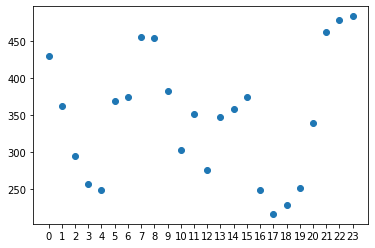

In [57]:
plt.scatter(songs_in_hour_pd['hour'], songs_in_hour_pd['count']);
#visualize it

In [58]:
import plotly_express as px
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [60]:
#using plotly express
px.line(songs_in_hour_pd, 'hour', 'count', title="How much song played on everyday (based on hour)")